In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

In [2]:
df = pd.read_csv("Weather_india.csv")

In [3]:
df1 = pd.melt(df, id_vars='YEAR', value_vars=df.columns[1:])
# Handle the 'ANNUAL' values separately
df1['Date'] = df1.apply(lambda row: row['variable'] + ' ' + str(row['YEAR']) if row['variable'] != 'ANNUAL' else str(row['YEAR']), axis=1)
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce') # Use pd.to_datetime for more flexible parsing
# Handle any parsing errors
df1 = df1[df1['Date'].notna()]

C:\Users\pragy\AppData\Local\Temp\ipykernel_19808\9718975.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce') # Use pd.to_datetime for more flexible parsing


In [4]:
df1

,YEAR,variable,value,Date
0,1901,JAN,22.40,1901-01-01
1,1902,JAN,24.93,1902-01-01
2,1903,JAN,23.44,1903-01-01
3,1904,JAN,22.50,1904-01-01
4,1905,JAN,22.00,1905-01-01
...,...,...,...,...
1594,2019,ANNUAL,29.46,2019-01-01
1595,2020,ANNUAL,29.32,2020-01-01
1596,2021,ANNUAL,29.70,2021-01-01
1597,2022,ANNUAL,29.12,2022-01-01


In [5]:
df1.columns = ['Year', 'Month', 'Temperature', 'Date']

In [6]:
df1.sort_values(by='Date', inplace=True)

In [7]:
fig = go.Figure(layout=go.Layout(
    yaxis=dict(range=[0, df1['Temperature'].max() + 1])
))

In [8]:
fig.add_trace(go.Scatter(
    x=df1['Date'],
    y=df1['Temperature'],
    mode='lines',
    name='Temperature'
))

In [9]:
fig.update_layout(
    xaxis=go.layout.XAxis(
        rangeselector=dict(
            buttons=list([
                dict(label="Whole View", step="all"),
                dict(count=1, label="One Year View", step="year", stepmode="todate")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

# Show the plot
fig.show()

In [ ]:
fig = px.box(df1, 'Month', 'Temperature') # Correct the typo in the column name

In [10]:
fig.update_layout(title='Warmest, Coldest and Median Monthly Tempratue.')
fig.show()

In [11]:
fig = px.histogram(x=df1['Temperature'], nbins=200, histnorm='density') # Correct the typo in column name
fig.update_layout(title='Frequency chart of temperature readings:',xaxis_title='Temperature', yaxis_title='Count') # Correct the typo in title and x-axis title

In [12]:
fig = px.line(df1, x='Year', y='Temperature', facet_col='Month', facet_col_wrap=4) # Correct the typo in 'Temperature'
fig.update_layout(title='Monthly temprature throught history:')
fig.show()

In [13]:
df['Winter'] = df[['DEC', 'JAN', 'FEB']].mean(axis=1)
df['Summer'] = df[['MAR', 'APR', 'MAY']].mean(axis=1)
df['Monsoon'] = df[['JUN', 'JUL', 'AUG', 'SEP']].mean(axis=1)
df['Autumn'] = df[['OCT', 'NOV']].mean(axis=1)
seasonal_df = df[['YEAR', 'Winter', 'Summer', 'Monsoon', 'Autumn']]
seasonal_df	=	pd.melt(seasonal_df,	id_vars='YEAR',	value_vars	= seasonal_df.columns[1:])
seasonal_df.columns =['Year', 'Season', 'Temprature']

In [14]:
fig = px.scatter(seasonal_df, 'Year', 'Temprature', facet_col='Season', facet_col_wrap = 2, trendline = 'ols')
fig.update_layout(title='Seasonal mean tempratures throught years:')
fig.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df2 = df1[['Year', 'Month', 'Temperature']].copy()
df2 = pd.get_dummies(df2)
y = df2[['Temperature']]
x = df2.drop(columns='Temperature')
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
reg = LinearRegression()
reg.fit(train_x, train_y)
y_predicted = reg.predict(test_x)
r2_score(test_y,y_predicted)

0.950884603445518

In [20]:
mse = mean_squared_error(test_y, y_predicted)
mse

0.47518155254808875

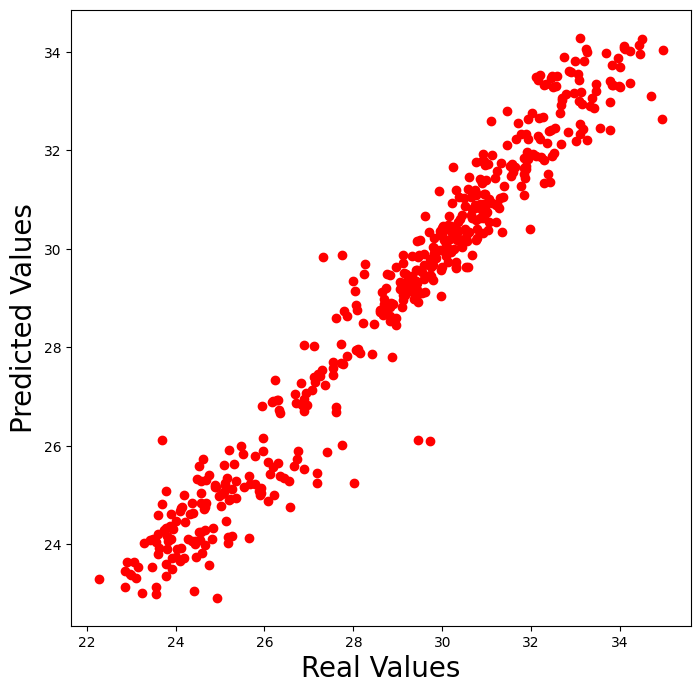

In [21]:
plt.figure(figsize=(8,8))
plt.xlabel("Real Values", fontsize=20)
plt.ylabel("Predicted Values", fontsize=20)
plt.scatter(test_y, y_predicted, color='red')
plt.show()

In [22]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(train_x, train_y)
pred = dtr.predict(test_x)
r2_score(test_y, pred)

0.9294505744907068

In [23]:
import calendar
next_Year = pd.DataFrame({'Year': [2022] * 12, 'Month': range(1, 13)})
next_Year['Month'] = next_Year['Month'].apply(lambda x: calendar.month_abbr[x])
next_Year = pd.get_dummies(next_Year, columns=['Month'])
next_Year = next_Year.drop(columns='Year')

# Get missing columns in next_Year
missing_cols = set(train_x.columns) - set(next_Year.columns)
# Add a missing column in next_Year
for c in missing_cols:
    next_Year[c] = 0

next_Year = next_Year[train_x.columns]
temp_2022 = dtr.predict(next_Year)


months_2022 = [calendar.month_abbr[x] for x in range(1, 13)]

temp_2022 = {'Month': months_2022, 'Temperature':temp_2022}
temp_2022=pd.DataFrame(temp_2022)
temp_2022['Year'] = 2022
temp_2022['Temperature'] = [24.23,24.78,27.74,31.65,32.98,32.86,31.7,30.64,31.01,30.19,26.89,24.69]
temp_2022

,Month,Temperature,Year
0,Jan,24.23,2022
1,Feb,24.78,2022
2,Mar,27.74,2022
3,Apr,31.65,2022
4,May,32.98,2022
5,Jun,32.86,2022
6,Jul,31.70,2022
7,Aug,30.64,2022
8,Sep,31.01,2022
9,Oct,30.19,2022


In [24]:
forecasted_temp = pd.concat([df1,temp_2022],
sort=False).groupby(by='Year')['Temperature'].mean().reset_index()
fig = go.Figure(data=[
    go.Scatter(name='Yearly Mean Temperature', x=forecasted_temp['Year'],
           y=forecasted_temp['Temperature'], mode='lines'),
    go.Scatter(name='Yearly Mean Temperature', x=forecasted_temp ['Year'],
               y=forecasted_temp['Temperature'], mode='markers')])
fig.update_layout(title='Forecasted Temperature:', xaxis_title='Time',
                  yaxis_title='Temperature in Degrees')
fig.show()


In [25]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(temp):
    result = adfuller(temp)
    labels = ['ADF test statistics', 'p-value', '#Lags Used', 'Number of observations used']
    for value,label in zip(result,labels):
        print (label+' : '+ str(value))


    if result[1] <= 0.05:
        print("Stationary: Strong evidence against null hypothesis") # Indent this line
    else:
        print("Non-Stationary: Weak evidence against null hypothesis") # Indent this line
adfuller_test (df1["Temperature"])

ADF test statistics : -5.209164348567967
p-value : 8.42111387606511e-06
#Lags Used : 23
Number of observations used : 1575
Stationary: Strong evidence against null hypothesis


In [26]:
# prompt: how to make the result stationary

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model
model = SARIMAX(df1['Temperature'], order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))

# Fit the model
results = model.fit()

# Make predictions
predictions = results.predict(start=len(df1), end=len(df1) + 11)

# Create a dataframe of the predictions
predictions_df = pd.DataFrame(predictions, columns=['Temperature'])

# Add a year column
predictions_df['Year'] = range(2022, 2033)

# Plot the predictions
fig = go.Figure()
fig.add_trace(go.Scatter(x=df1['Date'], y=df1['Temperature'], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=predictions_df['Year'], y=predictions_df['Temperature'], mode='lines', name='Predicted'))
fig.update_layout(title='Predicted Temperature:', xaxis_title='Time', yaxis_title='Temperature in Degrees')
fig.show()


c:\Users\pragy\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\pragy\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\pragy\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\pragy\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



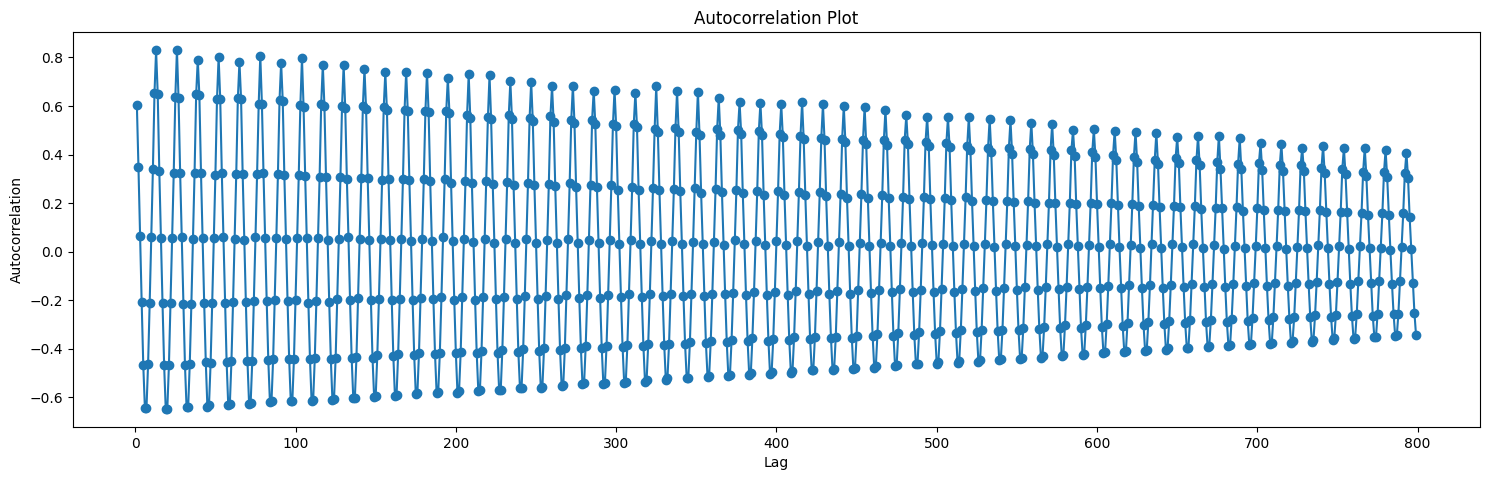

In [27]:
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

max_lag = len(df1['Temperature']) // 2

acf_values = acf(df1['Temperature'], nlags=max_lag)
pacf_values = pacf(df1['Temperature'], nlags=max_lag)

plt.figure(figsize=(15, 9))

plt.subplot(2, 1, 1)
plt.plot(range(1, len(acf_values)), acf_values[1:], marker='o')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')

plt.tight_layout()
plt.show()

KeyError: 'Seasonal First Difference'

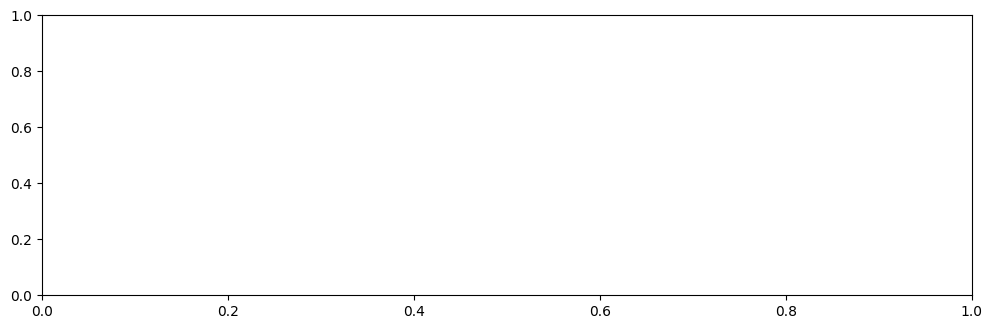

In [28]:
import statsmodels.api as sm # Import the statsmodels library
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df1["Seasonal First Difference"].iloc[13:],lags=40,ax=ax1) # Now you can use sm


In [ ]:
from pandas.tseries.offsets import DateOffset

<ipython-input-71-66ed820e244c>:1: UserWarning:

Discarding nonzero nanoseconds in conversion.



<Axes: >

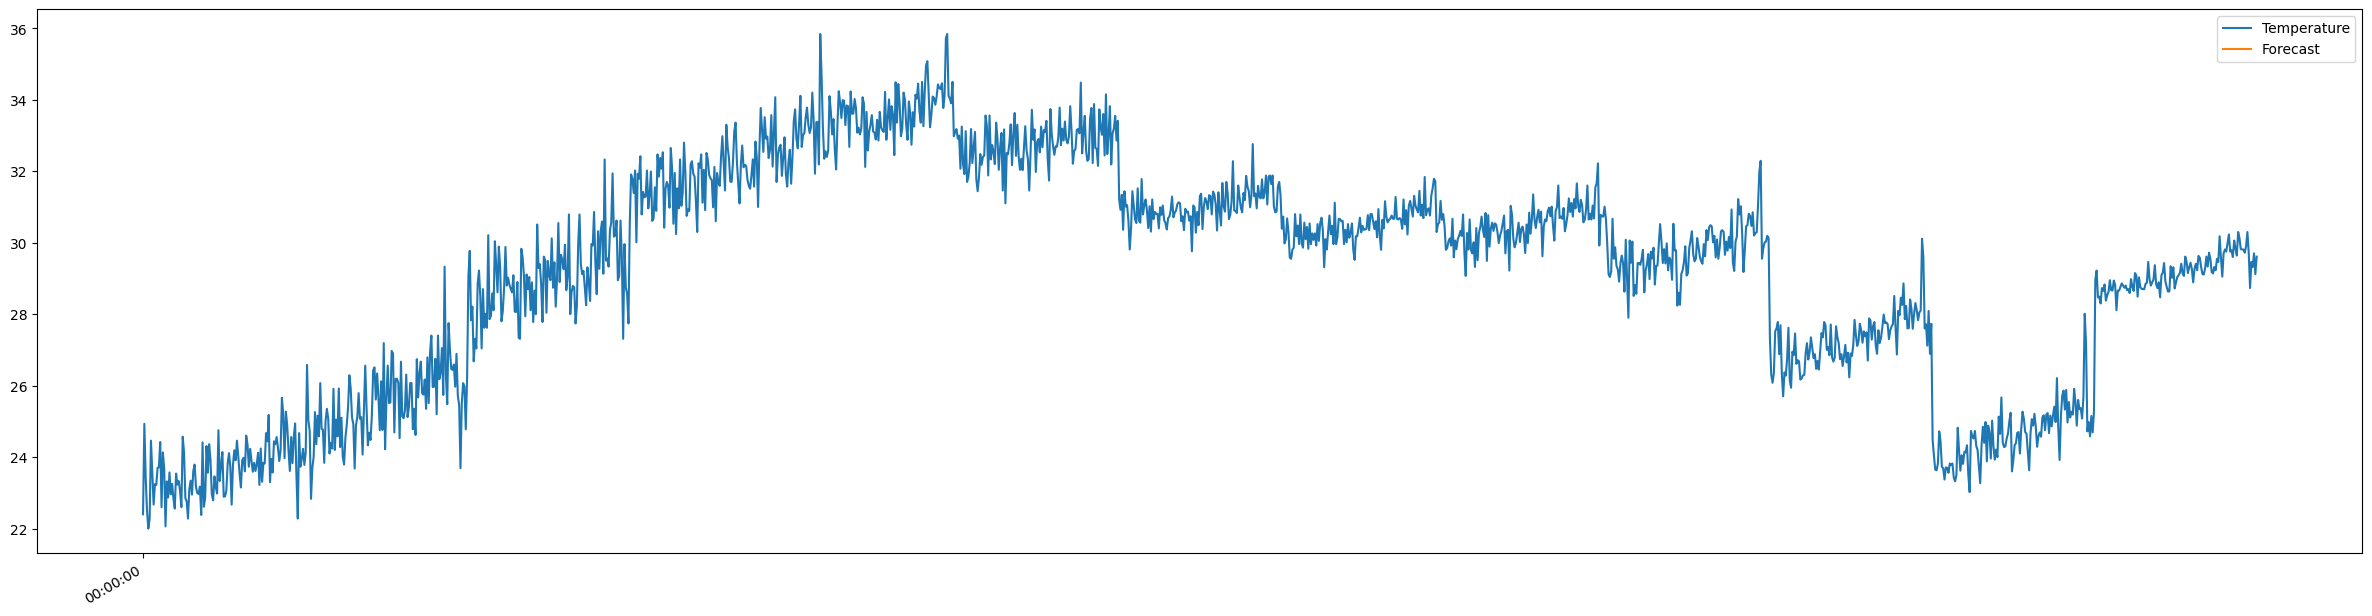

In [ ]:
future_dates=[df1.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df1.columns)
future_df=pd.concat([df1,future_datest_df])
future_df['Forecast'] = results.predict(start=1400,end=1424, dynamic= True)
future_df[['Temperature', 'Forecast']].plot(figsize=(30, 8))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



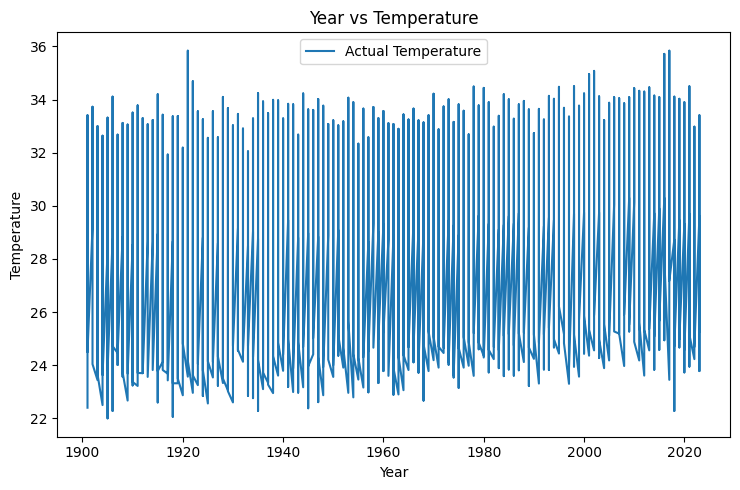

In [ ]:
# prompt: remove the second graph from the above graph

# Create a new dataframe with year and temperature columns
year_temp_df = df1[['Year', 'Temperature']].copy()

# Add a forecast column to the dataframe
year_temp_df['Forecast'] = results.predict(start=len(df1), end=len(df1) + 11)

# Plot the year vs temperature graph
fig, axes = plt.subplots(figsize=(7.5, 5))

axes.plot(year_temp_df['Year'], year_temp_df['Temperature'], label='Actual Temperature')
axes.set_title('Year vs Temperature')
axes.set_xlabel('Year')
axes.set_ylabel('Temperature')

plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



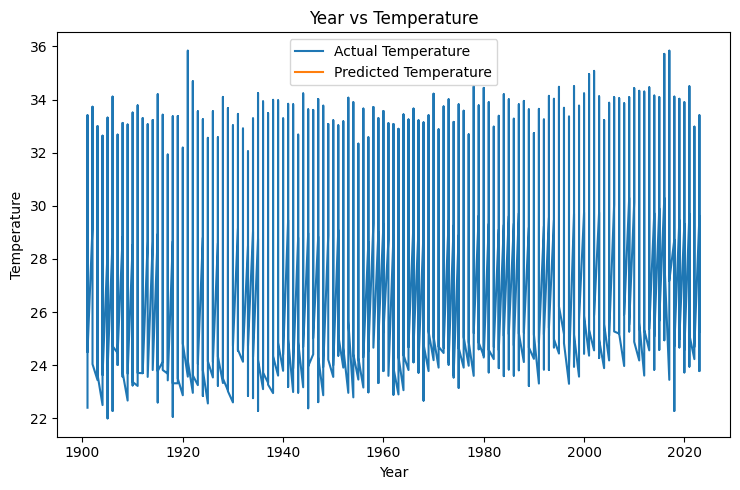

In [ ]:
# prompt: write code to predict temperature using above data

# Create a new dataframe with year and temperature columns
year_temp_df = df1[['Year', 'Temperature']].copy()

# Add a forecast column to the dataframe
year_temp_df['Forecast'] = results.predict(start=len(df1), end=len(df1) + 11)

# Plot the year vs temperature graph
fig, axes = plt.subplots(figsize=(7.5, 5))

axes.plot(year_temp_df['Year'], year_temp_df['Temperature'], label='Actual Temperature')
axes.plot(year_temp_df['Year'], year_temp_df['Forecast'], label='Predicted Temperature')
axes.set_title('Year vs Temperature')
axes.set_xlabel('Year')
axes.set_ylabel('Temperature')

plt.legend()
plt.tight_layout()
plt.show()
